Objective: to predict the default of credit card

The training data set includes a binary variable, default payment (Yes = 1, No = 0), as the target variable, and the following 23 variables as the features variables:

X1: Amount of the given credit: it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement. X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment. X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
data file: week12.csv

Actions
Based on the given training data set

describe the problem
design and document the roadmap
data preprocessing
learning
evaluation (20% data as test set)
prediction
conclusion and discussion

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

col_names=["id",
           "amt_given_credit",  # amount of given credit
           "gender",            # 1=male; 2=female
           "education",         # 1=grad school; 2=uni; 3=high school; 4=others
           "marital",           # 1=married; 2=single; 3=others
           "age",               # age

           # histories of past payments
           # -1=pay duly; 1=payment delay one month; 2=payment delay two months
           # ... 8=payment delay eight months; 9=payment delay nine months+
           "hist_sept", "hist_august", "hist_july",
           "hist_june", "hist_may", "hist_april",

           # amount of billing statements
           "billed_sept", "billed_august", "billed_july",
           "billed_june", "billed_may", "billed_april",

           # amount of previous payment
           "prev_sept", "prev_august", "prev_july",
           "prev_june", "prev_may", "prev_april",

           # default payment; 1=yes; 2=no
           "is_default"]
df = pd.read_csv('week12.csv', header=0, names=col_names)


## Data

In [11]:
df.head()

,id,amt_given_credit,gender,education,marital,age,hist_sept,hist_august,hist_july,hist_june,...,billed_june,billed_may,billed_april,prev_sept,prev_august,prev_july,prev_june,prev_may,prev_april,is_default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
print("Number of rows:", df.shape[0])
print ("Number of columns :",data.shape[1])

Number of rows: 30000
Number of columns : 25


In [13]:
print ("data info  :",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id                  30000 non-null int64
amt_given_credit    30000 non-null int64
gender              30000 non-null int64
education           30000 non-null int64
marital             30000 non-null int64
age                 30000 non-null int64
hist_sept           30000 non-null int64
hist_august         30000 non-null int64
hist_july           30000 non-null int64
hist_june           30000 non-null int64
hist_may            30000 non-null int64
hist_april          30000 non-null int64
billed_sept         30000 non-null int64
billed_august       30000 non-null int64
billed_july         30000 non-null int64
billed_june         30000 non-null int64
billed_may          30000 non-null int64
billed_april        30000 non-null int64
prev_sept           30000 non-null int64
prev_august         30000 non-null int64
prev_july           30000 non-null int64
prev_june           30000 non-

In [14]:
print (data.isnull().sum())

id                  0
amt_given_credit    0
gender              0
education           0
marital             0
age                 0
hist_sept           0
hist_august         0
hist_july           0
hist_june           0
hist_may            0
hist_april          0
billed_sept         0
billed_august       0
billed_july         0
billed_june         0
billed_may          0
billed_april        0
prev_sept           0
prev_august         0
prev_july           0
prev_june           0
prev_may            0
prev_april          0
is_default          0
dtype: int64


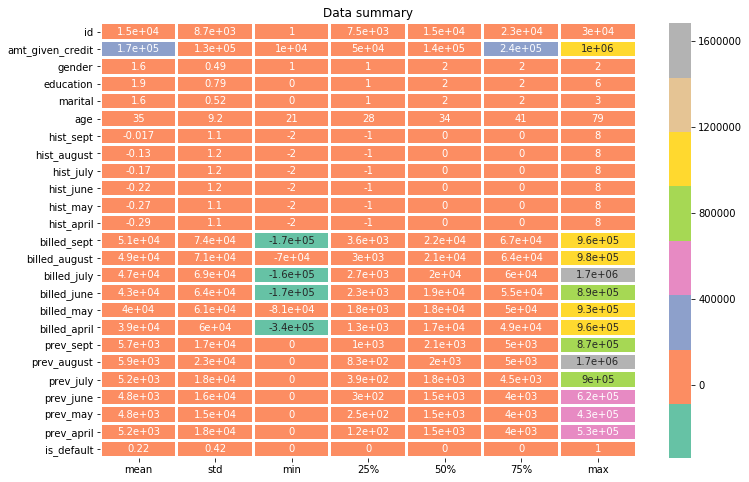

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("Set2"))
plt.title("Data summary")
plt.show()

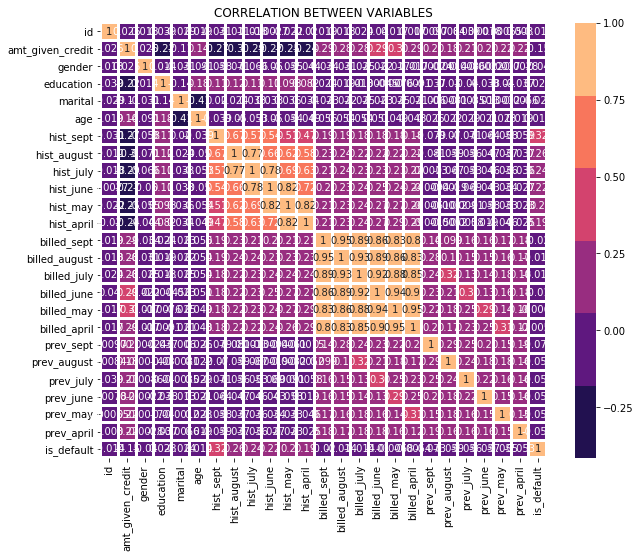

In [16]:
correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06695156 0.01396243 0.0334152  0.02148346 0.06570621 0.08066269
 0.05237436 0.02319438 0.05242184 0.03562754 0.021424   0.05102019
 0.04729384 0.04593103 0.04490552 0.0419252  0.04479705 0.0441879
 0.04156643 0.04085551 0.04115231 0.04259798 0.04654337]


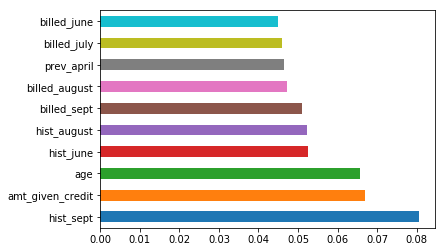

In [23]:
X = df.iloc[:,1:-1] #indpendent columns
y = df.iloc[:,-1]   #target column

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()